## 1. 지도학습 평가 지표

회귀 모델의 성능을 평가하는 다양한 지표들에 대해 설명하고, 각 지표를 계산하는 Python 코드를 제공하겠습니다.

### 평가지표 설명

1. **MAE (Mean Absolute Error)**:
   - 실제값과 예측값의 차이에 대한 절대값의 평균입니다.
   - 직관적이고 해석하기 쉬운 지표로, 모든 에러를 동일하게 취급합니다.
   - 공식: $$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y_i}|$$

2. **MAPE (Mean Absolute Percentage Error)**:
   - 에러 비율((실제값 - 예측값)/실제값)의 절대값에 대한 평균입니다.
   - 실제값의 크기에 따라 에러를 상대적으로 측정합니다.
   - 공식: $$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y_i}}{y_i} \right| \times 100\%$$

3. **MSE (Mean Squared Error)**:
   - 에러(실제값 - 예측값) 제곱의 평균입니다.
   - 큰 에러에 대해 더 큰 패널티를 부여합니다.
   - 공식: $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

4. **RMSE (Root Mean Squared Error)**:
   - MSE의 제곱근으로, 에러의 표준편차를 나타냅니다.
   - MSE의 단위를 원래의 값과 맞춰줍니다.
   - 공식: $$\text{RMSE} = \sqrt{\text{MSE}}$$

5. **R2 Score (R-squared)**:
   - 모델의 설명력을 나타내는 지표로, 1에 가까울수록 좋은 모델입니다.
   - 실제값의 분산 대비 예측값의 분산을 비교하여 계산됩니다.
   - 공식: $$\text{R}^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

#### 모델 평가지표 적용

MAE: 3426.426937430709
MAPE: 5.2618976821925605
MSE: 21026037.329511303
RMSE: 4585.415720467589
R2 Score: 0.9749154407708353


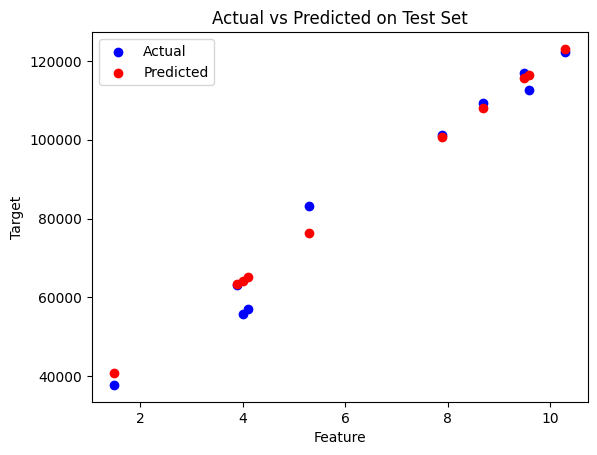

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 평가지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# MAPE 계산
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# 결과 출력
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# 결과 시각화
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Actual vs Predicted on Test Set')
plt.legend()
plt.show()

## 2. 실제 예제
#### 보스턴 집값 예측
- CRIM: 지역별 범죄 발생률
- ZN: 25,000평방피트를 초과하는 거주 지역의 비율
- NDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방 개수
- AGE: 1940년 이전에 건축된 소유 주택의 비율
- DIS: 5개 주요 고용센터까지의 가중 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000달러당 재산세율
- PTRATIO: 지역의 교사와 학생 수 비율
- B: 지역의 흑인 거주 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)
- target: 실제 집값


In [16]:
# 데이터 로딩
df = pd.read_csv('boston.csv')

df.head(), df.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  target  
 0     15.3  396.90   4.98    24.0  
 1     17.8  396.90   9.14    21.6  
 2     17.8  392.83   4.03    34.7  
 3     18.7  394.63   2.94    33.4  
 4     18.7  396.90   5.33    36.2  ,
 (506, 14))

In [15]:
## Null값 확인

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [12]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [24]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [30]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()

In [31]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)

y_pred

array([16.29286997, 27.88790589, 39.41456053, 18.37096451, 30.16518358,
       37.77794671, 25.36606436, 10.39741797, 14.74083652, 31.73078036,
       28.79292061, 19.1471567 , 13.81677825, 31.83932417, 16.49252123,
       21.47578303, 20.38810822, 37.71686776, 18.11178137, 15.78990777,
       13.7771029 , 24.49111234, 33.08173484, 39.52018398, 31.52573143,
       22.34110087, 17.65956144, 20.81329507, 23.34233612, 20.61052169,
       25.84461476, 33.97409459, 15.35704895, 21.95151795, 24.08989232,
       34.77474387, 29.21132206, 18.24716868, 13.92911938, 38.43793451,
       31.00188414, 18.77580256, 19.7698502 , 40.50221132,  8.12937003,
       27.19648109, 19.26132809, 25.65669217, 15.45600034, 25.92350904,
       34.75585974, 24.34306909, 19.59508197, 12.40858537, 24.55946383,
       17.97968819,  9.72456537,  2.27891777, 31.46417649, 13.59430001,
       19.99441875, 22.53304075, 20.26468044, 17.83848399, 25.05876782,
       27.03508049, 25.90862078, 22.28206346, 24.65401423, 30.38

ValueError: x and y must be the same size

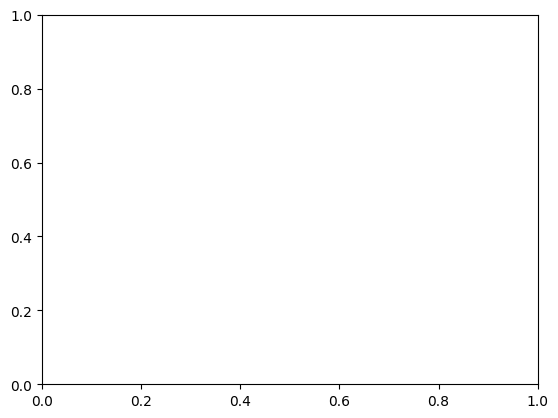

In [35]:
# Regression plot
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.show()